In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [30]:
rootdir = '/local/data/bSOSE/'
niter = 'iter133NEW'
freq = '5day'
chunks = 1
filenames = 'bsose_i133_2013to2018_5day_MLD.nc'
ds = xr.open_mfdataset(rootdir+niter+'/'+freq+'/'+filenames,chunks={'time':chunks})
ds = ds.roll(XC=-300,roll_coords=False).assign_coords({'XC':np.arange(-300,60,1/6)})

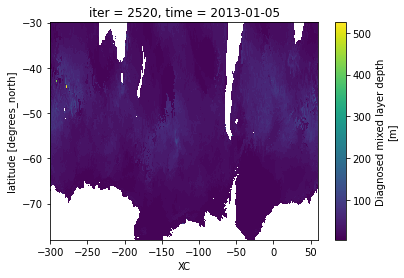

In [31]:
ds['BLGMLD'].sel(time=ds['time'][0],YC=slice(-90,-30)).plot()

In [32]:
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [33]:
climatology = ds['BLGMLD'].groupby('time.month').mean()

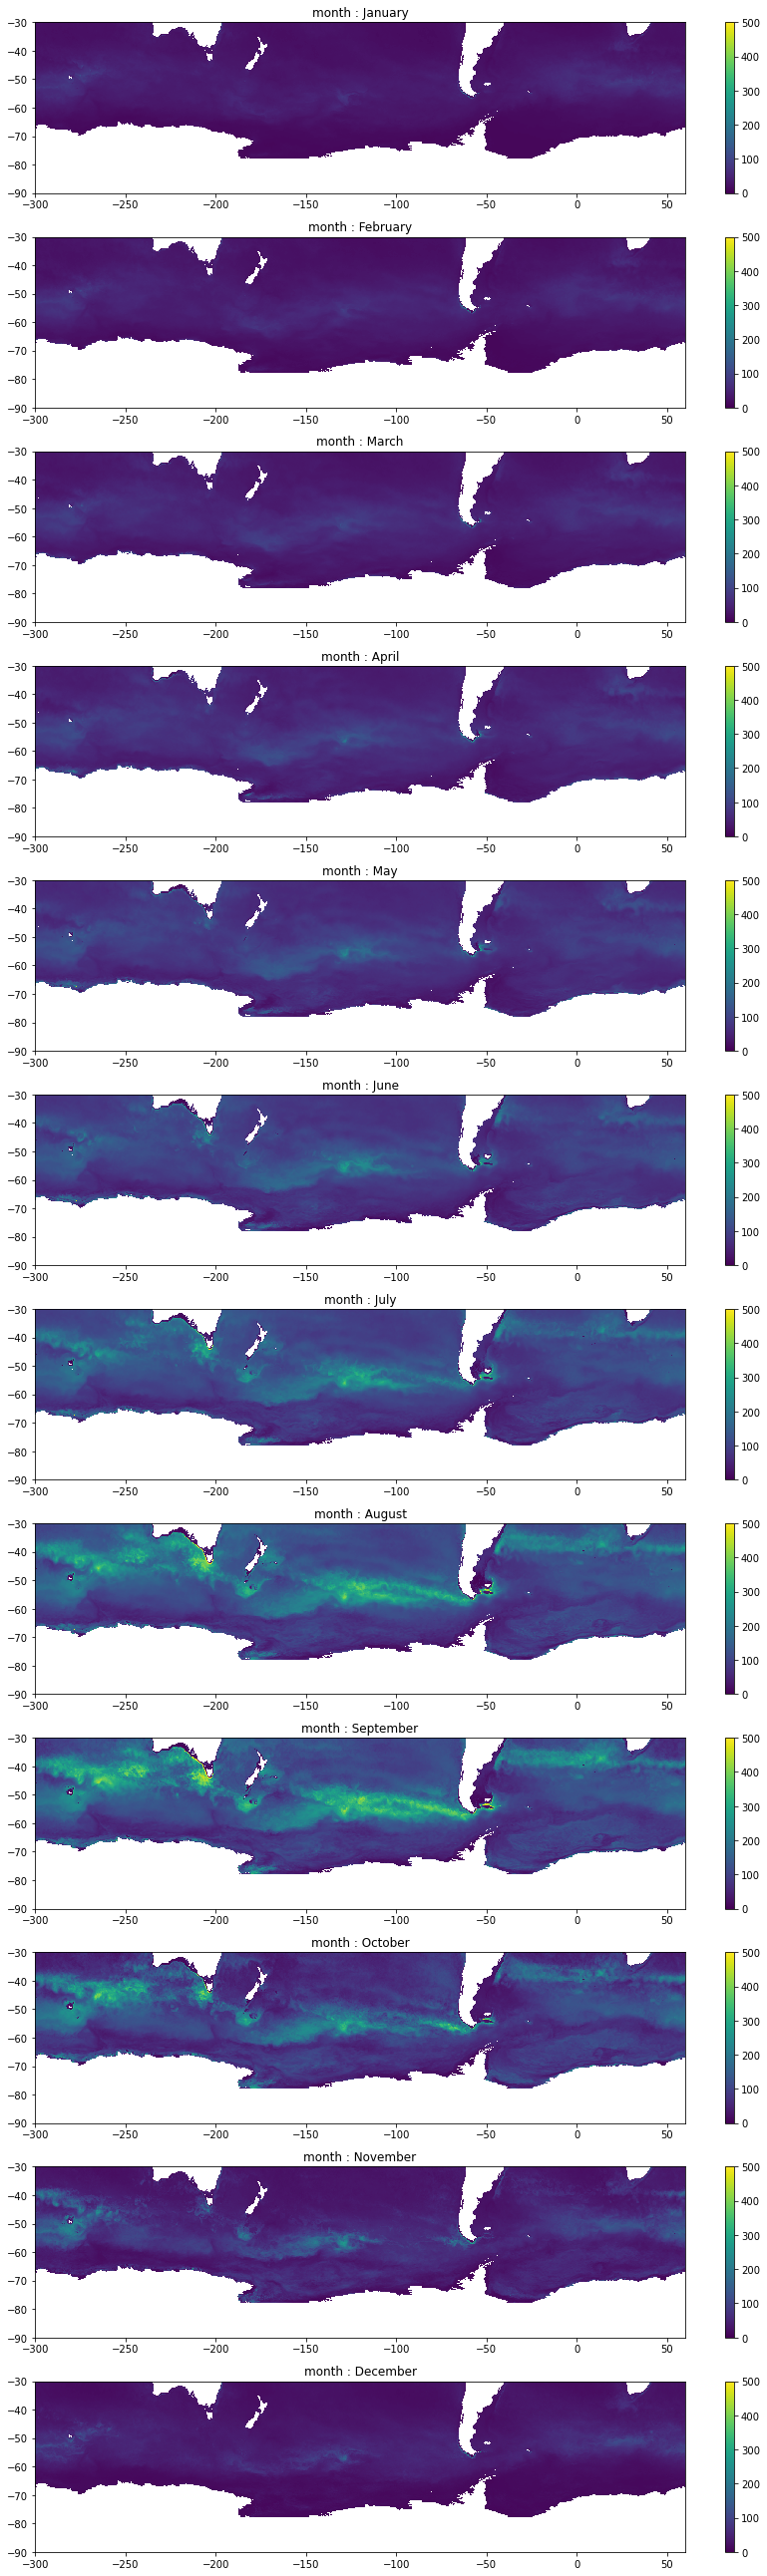

In [36]:
select = {'YC':slice(-90,-30)}
kwargs = {'vmin':0,'vmax':500}
x = ds['XC']
y = ds['YC'].sel(select)
fig,axarr = plt.subplots(figsize = (12,3*12),nrows=12)
for i,month in enumerate(climatology['month']):
    select['month']=month
    ax = axarr.flat[i]
    z = climatology.sel(select)
    im = ax.pcolormesh(x,y,z,**kwargs,shading='auto')
    ax.set_title('month : '+months[int(month)])
    ax.set_ylim([-90,-30])
    plt.colorbar(im,ax=ax)
fig.tight_layout()

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 588, time: 438)
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2013-01-05 2013-01-10 ... 2018-12-30
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.98 -77.95 -77.91 -77.88 ... -30.02 -29.87 -29.72
    Depth    (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
    rA       (YC, XC) float32 dask.array<chunksize=(588, 2160), meta=np.ndarray>
Data variables:
    BLGMLD   (time, YC, XC) float32 dask.array<chunksize=(1, 588, 2160), meta=np.ndarray>